<a href="https://colab.research.google.com/github/Rachhh53/House-Prices-Advanced-Regression-Techniques-Kaggle/blob/main/house_prices_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

The dependent variable of interest is house prices in Ames, Iowa (‘SalePrice’). 

In [3]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [4]:
# Import test and train datasets
df_train = pd.read_csv('https://raw.githubusercontent.com/Rachhh53/House-Prices-Advanced-Regression-Techniques-Kaggle/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Rachhh53/House-Prices-Advanced-Regression-Techniques-Kaggle/main/test.csv')

# View first lines of training data
df_train.head(n=4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [5]:
# View first lines of test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


SalesPrice is omitted since it is our dependent variable.

# EDA

In [6]:
# view data types and mission values on the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<span style="color:blue">Observations:</span><br>
LotFrontage has <strong>259</strong> (1460-1201) missing values. <br>
Alley has <strong>1369</strong> (1460-91) missing values.<br>
MasVnrType has <strong>8</strong> (1460-1452) missing values.<br>
MasVnrArea has <strong>8</strong> (1460-1452) missing values.<br>
BsmtQual has <strong>37</strong> (1460-1423) missing values.<br>
BsmtCond has <strong>37</strong> (1460-1423) missing values.<br>
BsmtExposure has <strong>38</strong> (1460-1422) missing values.<br>
BsmtFinType1 has <strong>37</strong> (1460-1423) missing values.<br>
BsmtFinType2 has <strong>38</strong> (1460-1422) missing values.<br>
Electrical has <strong>1</strong> (1460-1459) missing value.<br>
FireplaceQu has <strong>690</strong> (1460-770) missing values.<br>
GarageType has <strong>81</strong> (1460-1379) missing values.<br>
GarageYrBlt has <strong>81</strong> (1460-1379) missing values.<br>
GarageFinish has <strong>81</strong> (1460-1379) missing values.<br>
GarageQual has <strong>81</strong> (1460-1379) missing values.<br>
GarageCond has <strong>81</strong> (1460-1379) missing values.<br>
PoolQC has <strong>1453</strong> (1460-7) missing values.<br>
Fence has <strong>1179</strong> (1460-281) missing values.<br>
MiscFeature has <strong>1406</strong> (1460-54) missing values.<br>

In [7]:
# credit: https://www.kaggle.com/gorkembakir/hp-eda
def plot_hist(variable):
    plt.figure(figsize=(7,3))
    plt.hist(df_train[variable],bins=30)
    plt.xlabel(variable)
    plt.title("{}".format(variable))
    plt.show()

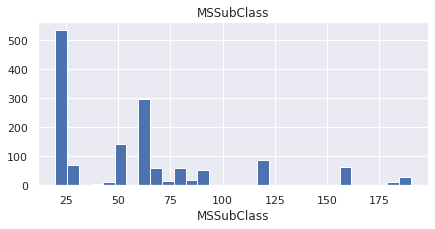

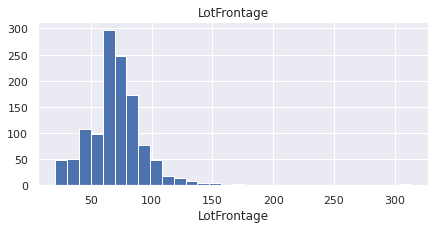

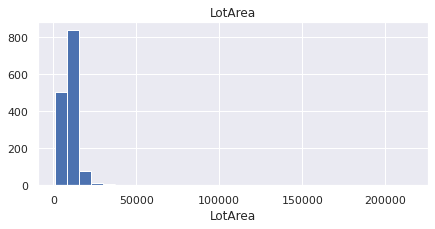

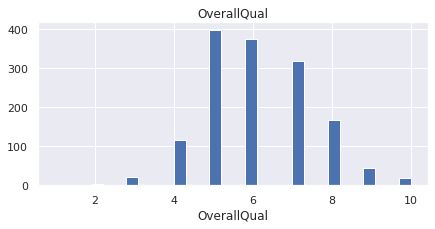

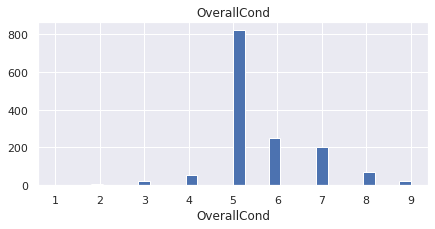

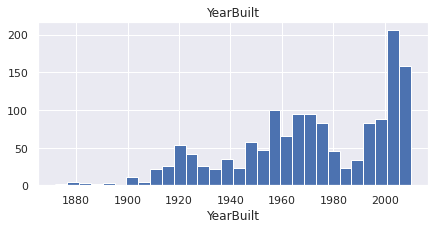

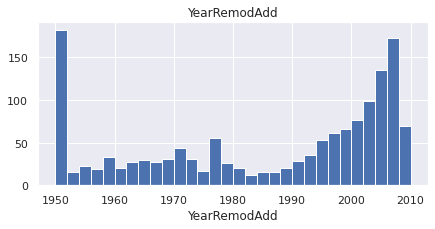

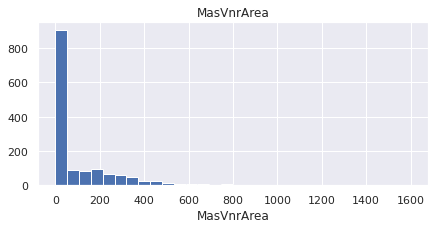

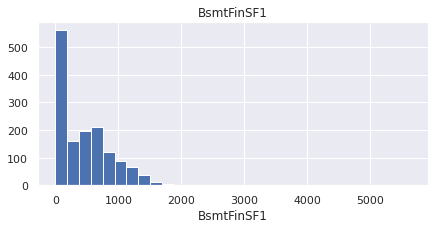

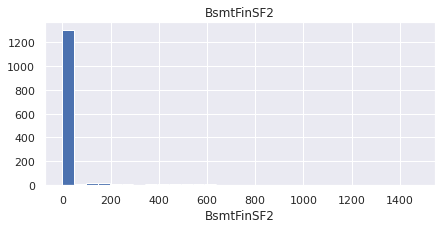

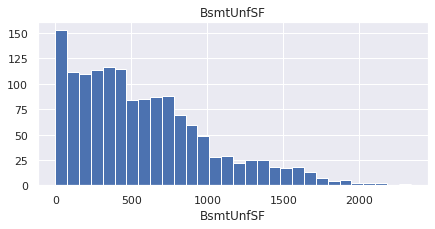

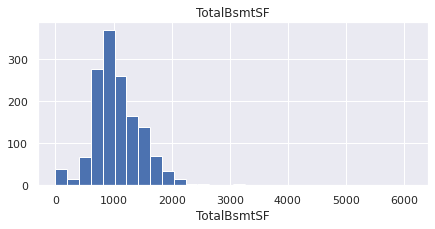

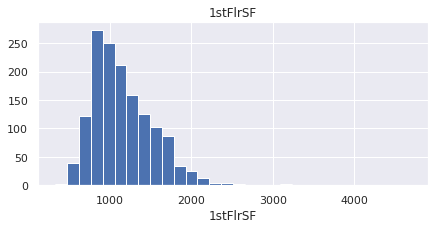

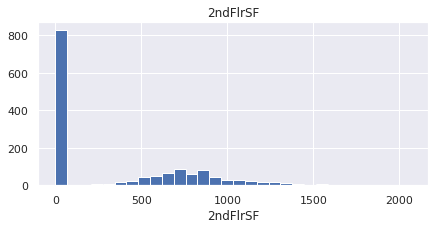

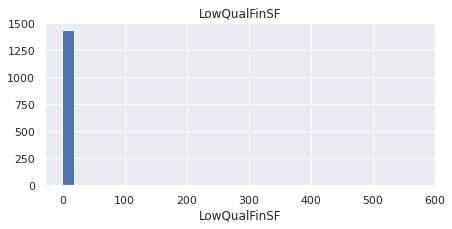

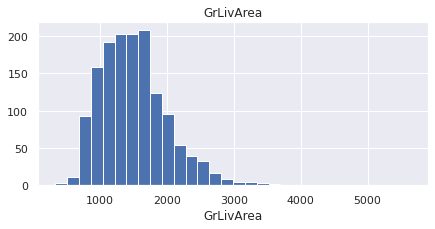

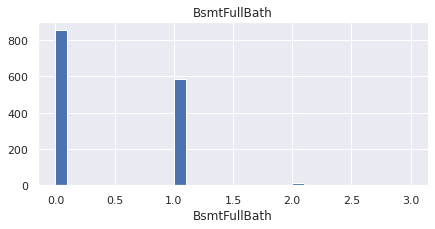

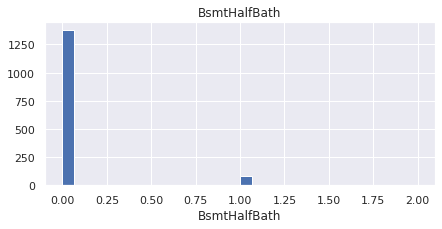

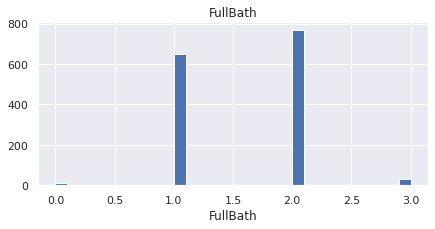

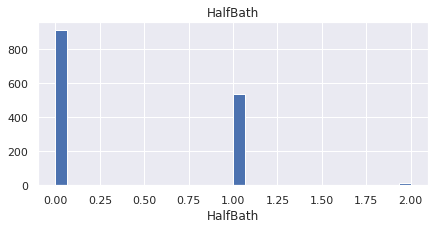

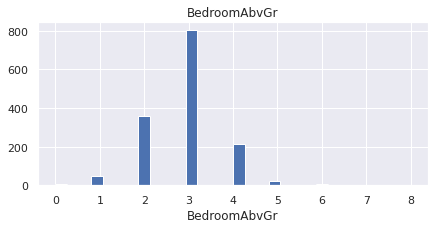

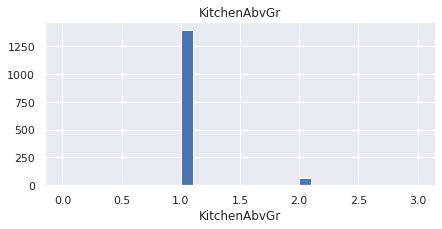

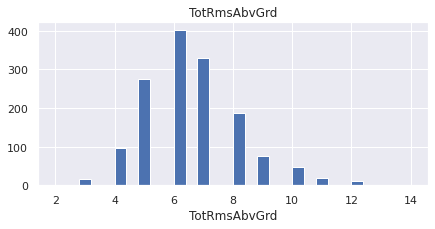

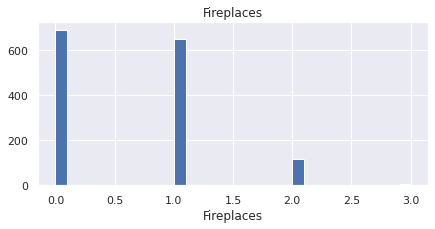

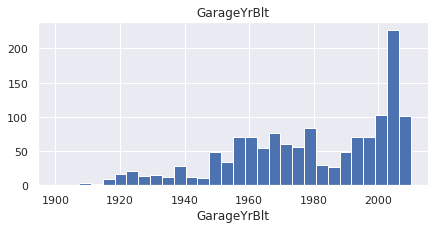

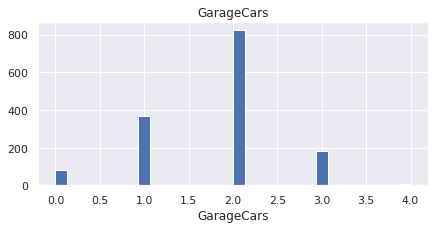

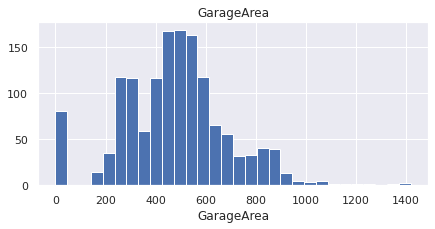

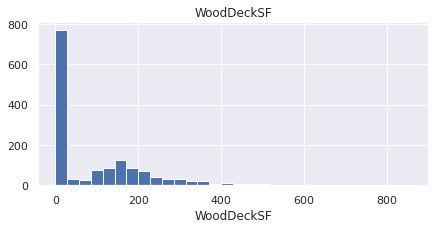

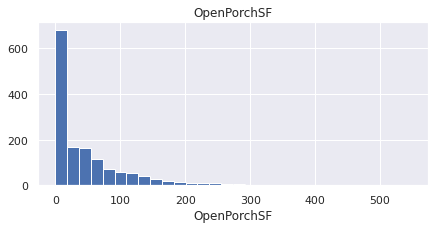

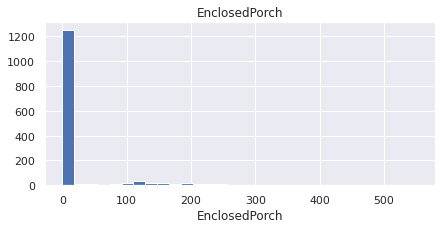

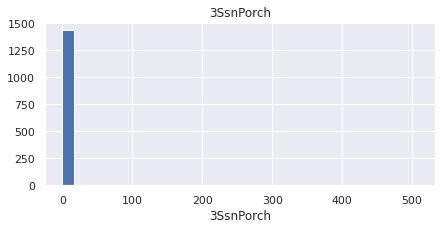

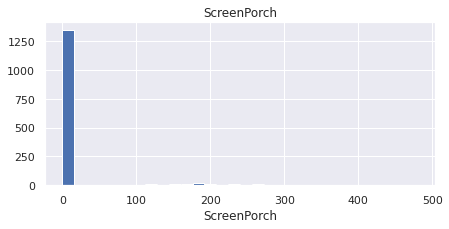

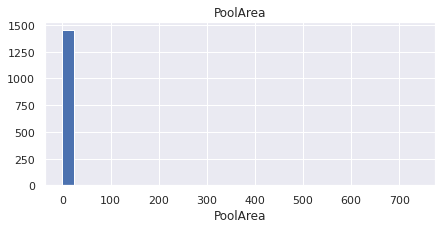

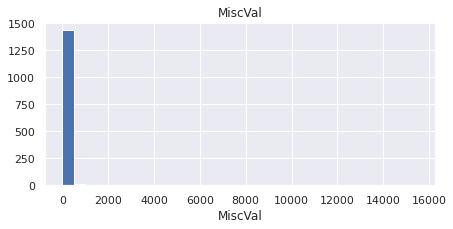

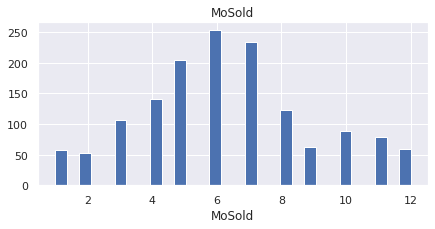

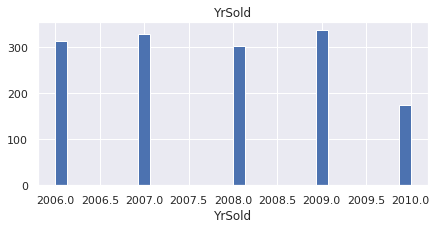

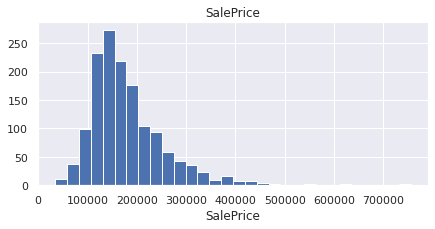

In [8]:
# some feature distributions
numeric=[
'MSSubClass',
'LotFrontage',
'LotArea',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageYrBlt',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold',
'SalePrice',
]
for n in numeric:
    plot_hist(n)

<h3>1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.</h3>

In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<h4>A linear regression fit and univariate KDE curves.</h4>

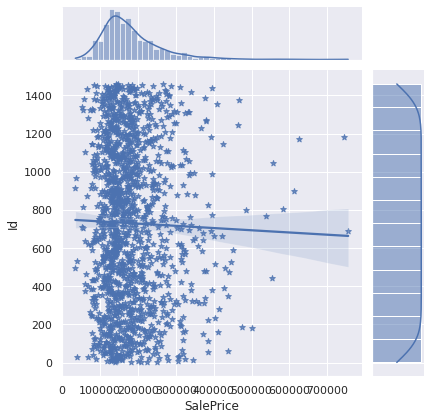

In [10]:
# here "*" is used as a marker for scatterplot
sns.jointplot(data=df_train, x="SalePrice", y="Id", kind="reg", marker="*")

I used Id as the y-axis to ensure I saw all data about SalePrice without noise.<br>
<span style="color:blue">Observations:</span><br>
It looks like there are a few outliers at the highest sale price, leading to a long right tail, but the distibution is mostly normal for SalePrice.

<h3>2. Investigate missing data and outliers.</h3>

<h4>Missing Data</h4>

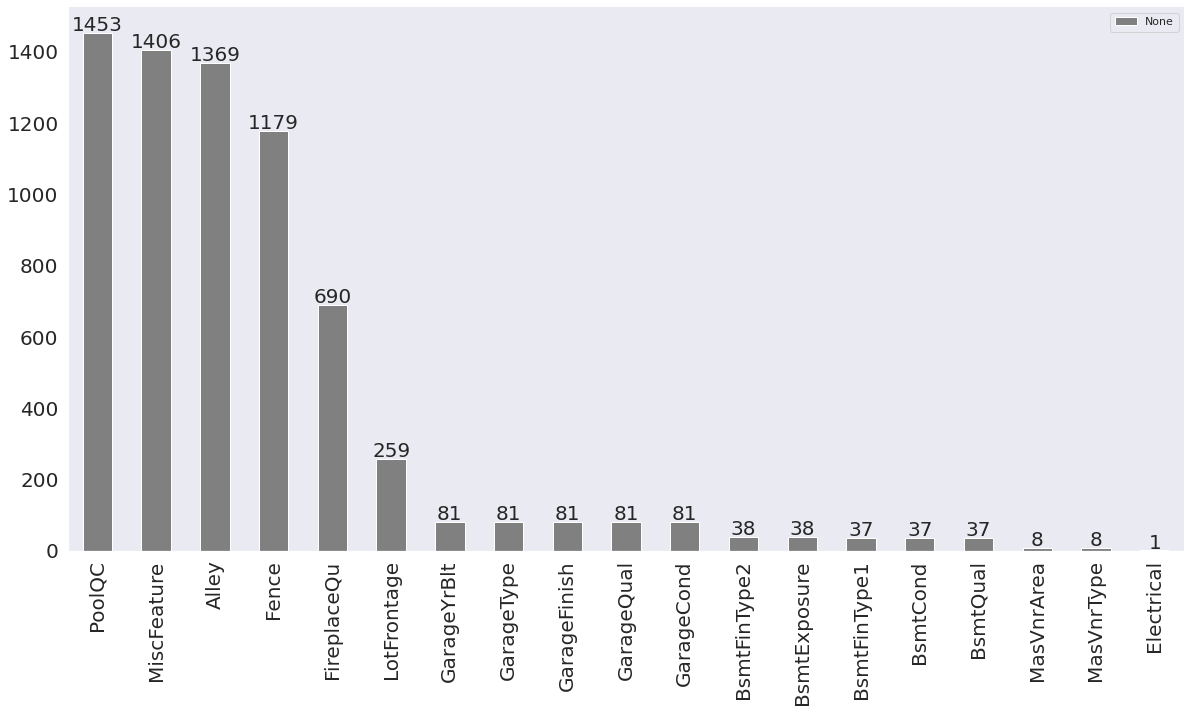

In [11]:
# credit: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price
# .loc[:, ] sets a value for an entire column
isnull_series = df_train.loc[:,:'SaleCondition'].isnull().sum()
isnull_series[isnull_series > 0].sort_values(ascending=False)

plt.figure(figsize = (20,10))
ax = isnull_series[isnull_series > 0].sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.legend(loc = 'upper right')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 5, height, ha = 'center', size = 20)
sns.despine()

All the above features have missing data.

<h4>Outliers</h4>

In [12]:
def get_boxplots(feat):
    plt.figure()
    return sns.boxplot(x=df_train[feat])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

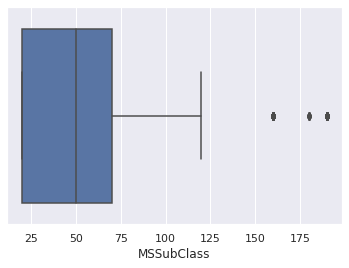

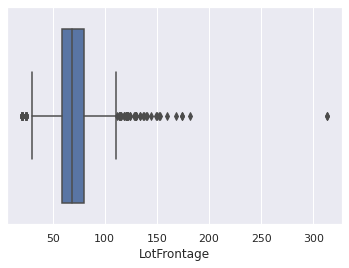

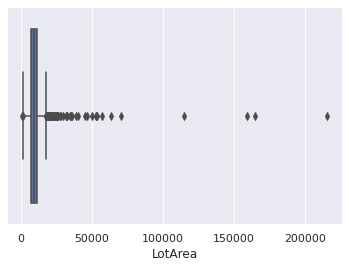

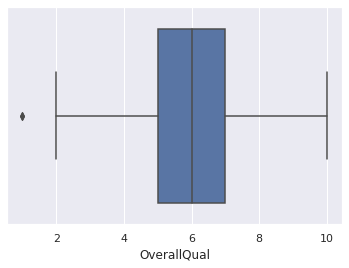

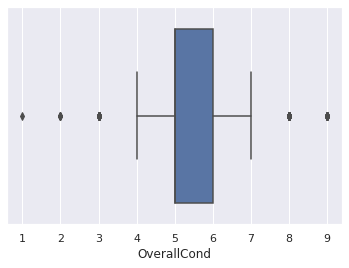

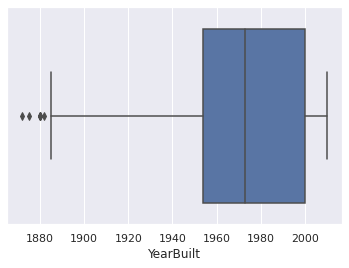

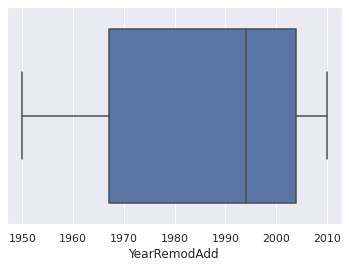

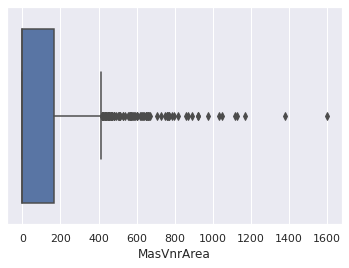

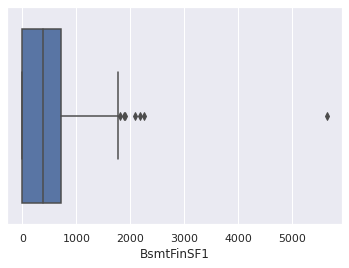

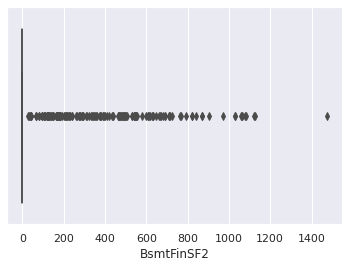

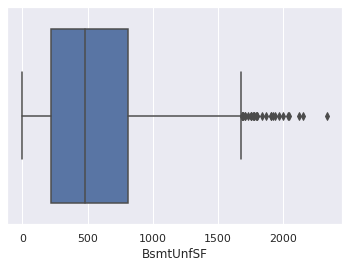

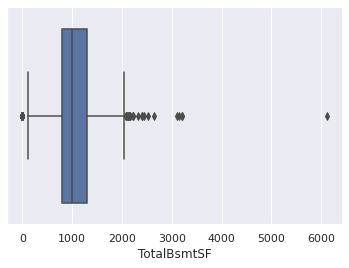

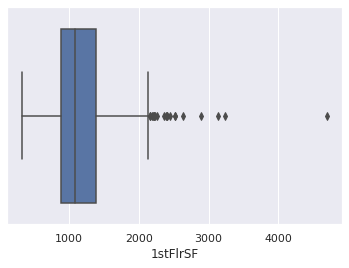

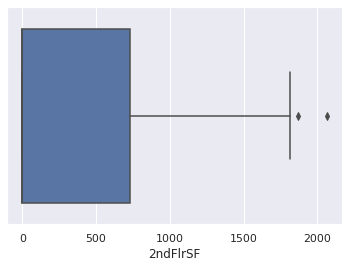

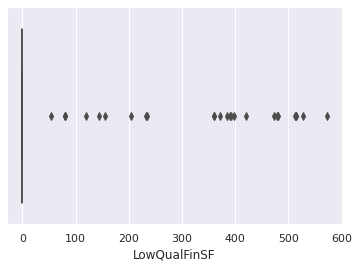

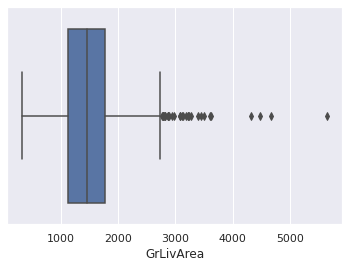

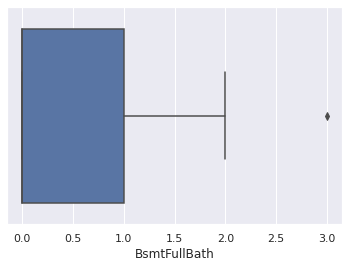

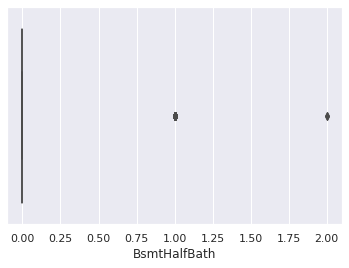

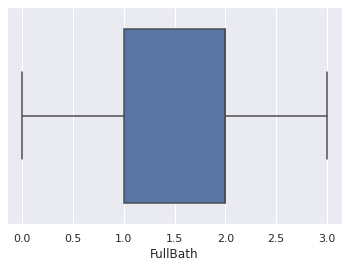

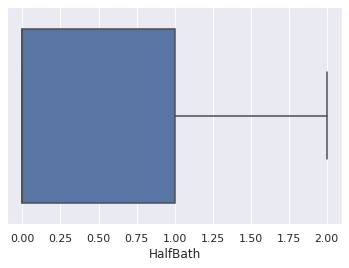

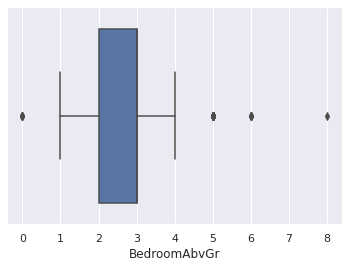

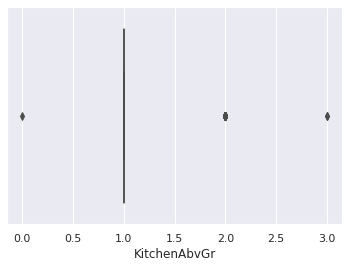

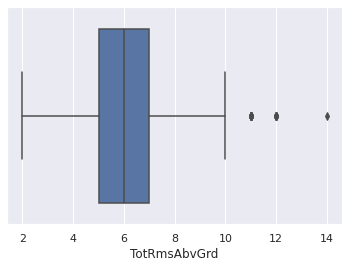

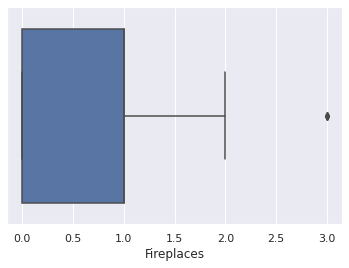

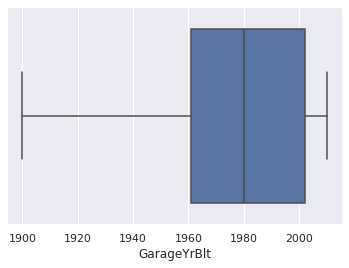

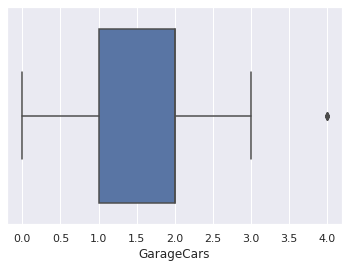

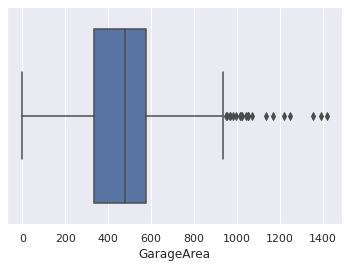

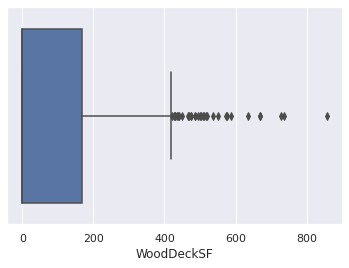

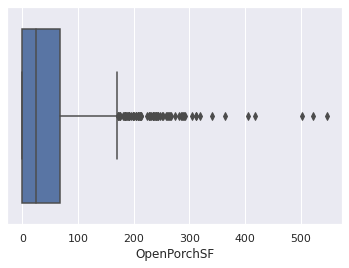

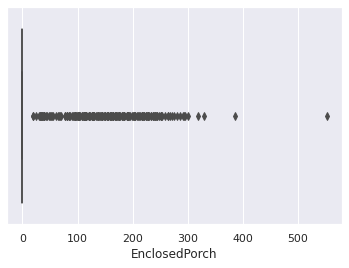

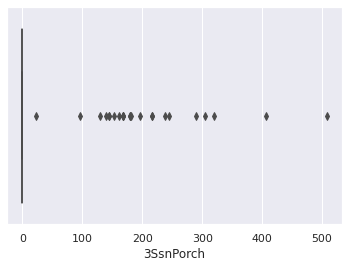

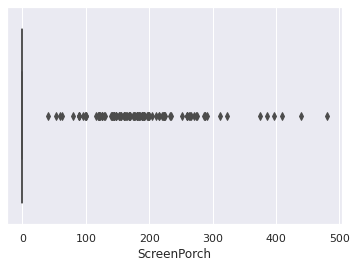

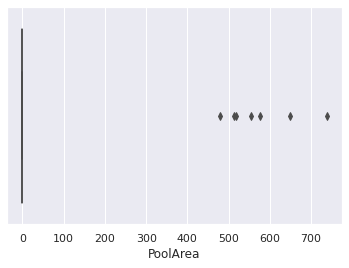

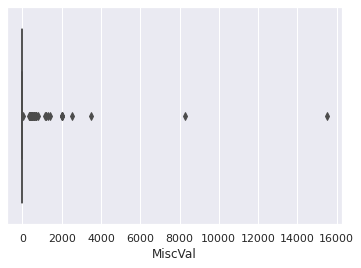

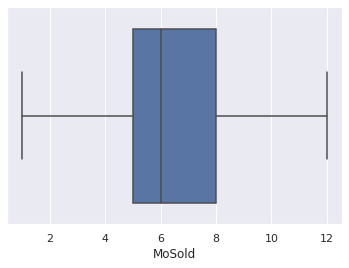

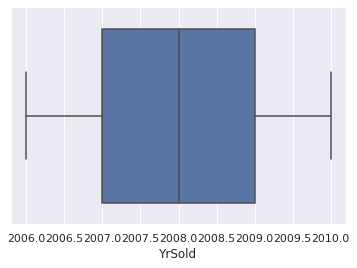

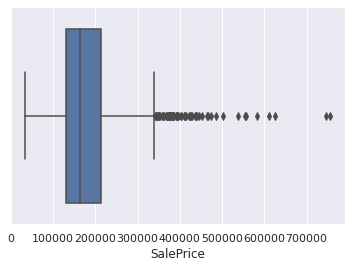

In [13]:
# boxplots to identify outliers
for f in numeric:
    get_boxplots(f)

<span style="color:blue">Observations:</span><br>
Almost all of our features have an outlier or two. Some of our features do not follow a normal distribution and appear as entirely outliers.<br>
For example: An obvious feature to see an outlier is in KitchenAvbGr. Most would expect that homes have a kitchen on the ground floor. A home with 0, 2 or 3 kitchens on the ground floor has been flagged as an outlier.

<h3>3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.</h3>

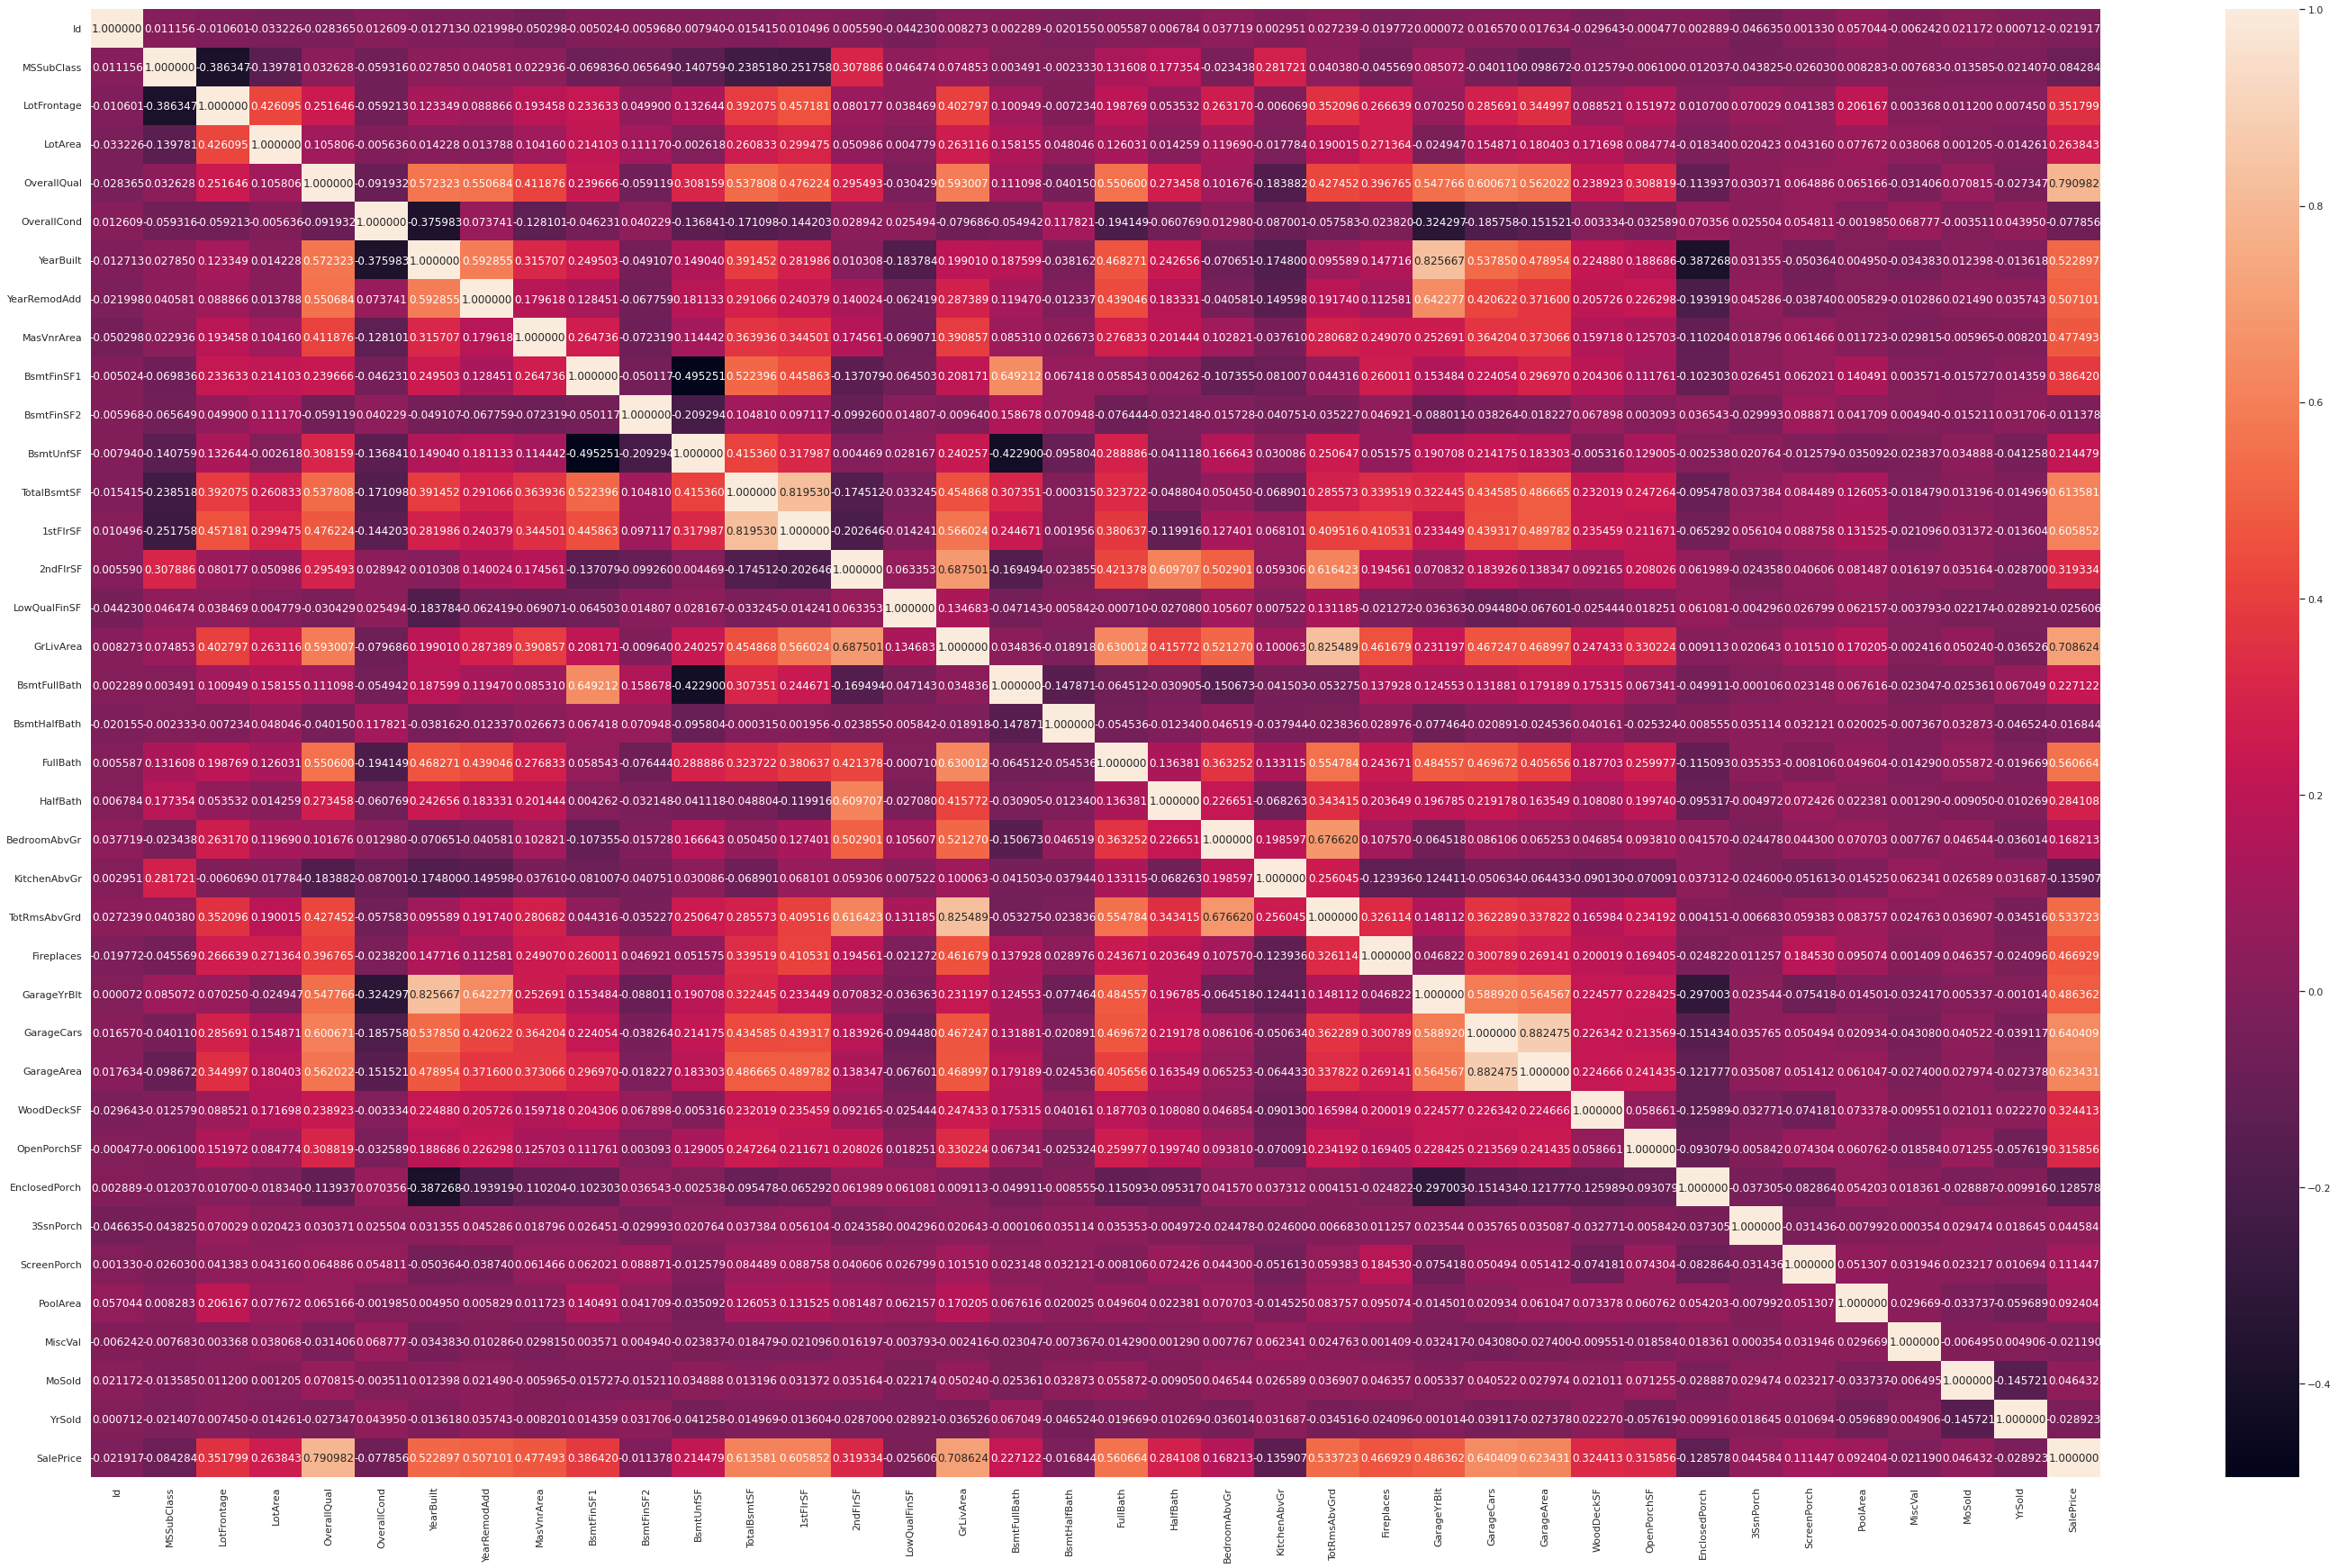

In [14]:
# credit: https://www.kaggle.com/gorkembakir/hp-eda
f, ax =plt.subplots(figsize=(50,30))
sns.heatmap(df_train.corr(),annot=True, fmt="1f", ax=ax)
plt.show()

<span style="color:blue">Observations:</span><br>
<strong>Features with > 50% positive correlation to our dependent variable SalesPrice:</strong><br>
OverallQual<br>
YearBuilt<br>
YearRemodAdd<br>
TotalBsmtSF<br>
1stFlSF<br>
GrLivArea<br>
FullBath<br>
TotRmsAbvGrd<br>
GarageCars<br>
GarageArea<br>

In [15]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

<h4>Potential Predictor of the dependent variable (SalePrice) #1: OverallQual</h4>

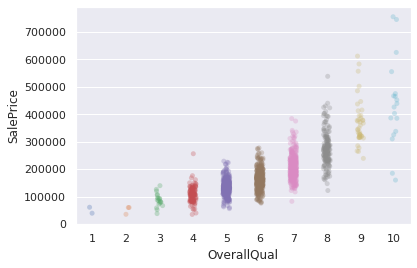

In [16]:
sns.stripplot(x='OverallQual', y='SalePrice', data=df_train, alpha=0.3, jitter=True);

<span style="color:blue">Observations:</span><br>
This appears to confirm that as overall quality increase, so does sale price.

In [17]:
oq=df_train[["OverallQual","SalePrice"]].groupby(["OverallQual"], as_index=False).count().sort_values(by="SalePrice",ascending="True")
oq

,OverallQual,SalePrice
0,1,2
1,2,3
9,10,18
2,3,20
8,9,43
3,4,116
7,8,168
6,7,319
5,6,374
4,5,397


This shows us counts associated with each overall quality score.

In [18]:
oq2=df_train[["OverallQual","SalePrice"]].groupby(["OverallQual"], as_index=False).mean().sort_values(by="SalePrice",ascending="True")
oq2

,OverallQual,SalePrice
0,1,50150.000000
1,2,51770.333333
2,3,87473.750000
3,4,108420.655172
4,5,133523.347607
5,6,161603.034759
6,7,207716.423197
7,8,274735.535714
8,9,367513.023256
9,10,438588.388889


<span style="color:blue">Observations:</span><br>
This supports the idea that as sales price increases, so does quality score.

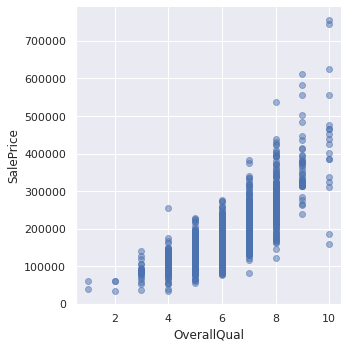

In [19]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

<h4>Potential Predictor of the dependent variable (SalePrice) #2: YearRemodAdd</h4>

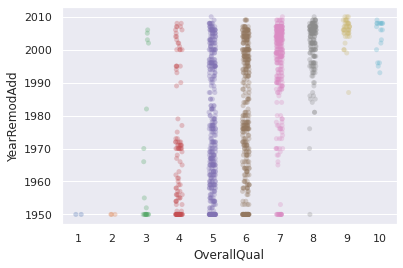

In [20]:
sns.stripplot(x='OverallQual', y='YearRemodAdd', data=df_train, alpha=0.3, jitter=True);

In [21]:
yra2=df_train[["YearRemodAdd","SalePrice"]].groupby(["YearRemodAdd"], as_index=False).mean().sort_values(by="SalePrice",ascending="True")
yra2

,YearRemodAdd,SalePrice
2,1952,110398.600000
0,1950,117463.056180
21,1971,120230.555556
4,1954,121142.857143
32,1982,121271.428571
...,...,...
57,2007,224807.250000
56,2006,229471.134021
58,2008,269709.100000
59,2009,284085.391304


<span style="color:blue">Observations:</span><br>
This supports the idea that the more recently remodeled homes are selling for higher prices.

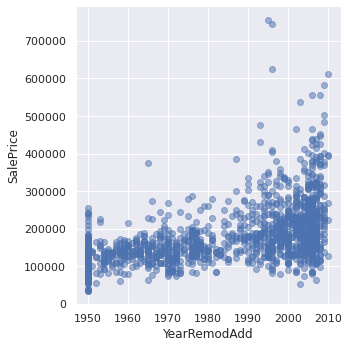

In [22]:
sns.lmplot(x='YearRemodAdd', y='SalePrice', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

<span style="color:blue">Observations:</span><br>
It's not super strong, but it does look like there is increased density around the later years and only later years have very high sale prices.

<h4>Potential Predictor of the dependent variable (SalePrice) #2: GarageArea</h4>

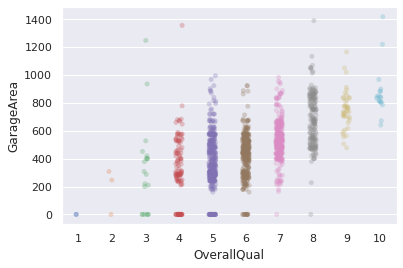

In [23]:
sns.stripplot(x='OverallQual', y='GarageArea', data=df_train, alpha=0.3, jitter=True);

<span style="color:blue">Observations:</span><br>
This one is not as highly correlated. This says that garage area is not the only determining factor of a higher sales price.

In [24]:
ga=df_train[["GarageArea","SalePrice"]].groupby(["GarageArea"], as_index=False).mean().sort_values(by="SalePrice",ascending="True")
ga

,GarageArea,SalePrice
75,350,60000.0
42,287,72500.0
5,189,78000.0
8,200,79125.0
437,1248,81000.0
...,...,...
325,716,556581.0
428,1020,582933.0
364,807,625000.0
368,813,745000.0


<span style="color:blue">Observations:</span><br>
Again, some home with smaller garages are selling for a higher price, supporting the idea that garage size alone is not a predictor of sale price.

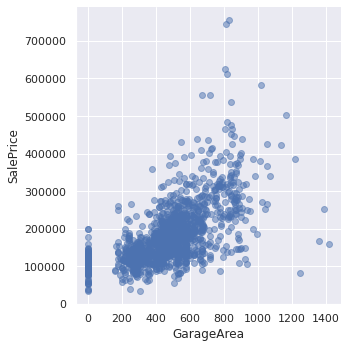

In [25]:
sns.lmplot(x='GarageArea', y='SalePrice', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

<span style="color:blue">Observations:</span><br>
There must be another factor that would cause this feature to correlate better with sale price. 

<h3>4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.</h3>

Create a feature that indicates if the home has a garage or not.

In [26]:
for index, row in enumerate(df_train["GarageType"]):
    #print(row)
    if pd.isna(row):
        df_train.loc[index, "HasGarage"] = "Yes"
    else:
        df_train.loc[index, "HasGarage"] = "No"

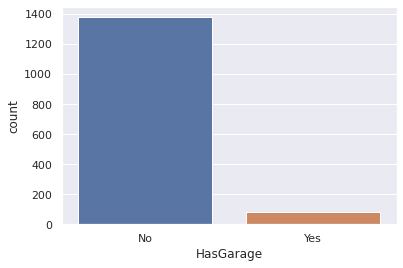

In [32]:
#sns.lmplot(x='HasGarage', y='SalePrice', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});
sns.countplot(x='HasGarage', data=df_train);

Did a little check-see to ensure we have some of each value coming through.

<h3>5. Using the dependent variable, perform both min-max and standard scaling in Python.</h3>

<h4>min-max</h4>

                0            1   ...           36           37
count  1460.000000  1460.000000  ...  1460.000000  1460.000000
mean      0.500000     0.217043  ...     0.453938     0.202779
std       0.288972     0.248827  ...     0.332024     0.110321
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.250000     0.000000  ...     0.250000     0.132030
50%       0.500000     0.176471  ...     0.500000     0.177892
75%       0.750000     0.294118  ...     0.750000     0.248715
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 38 columns]


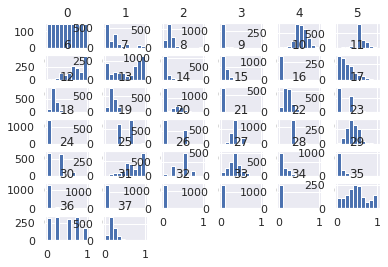

In [33]:
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# retrieve just the numeric input values
data = df_train.select_dtypes(include=[np.number])
#print(data)
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data_trans = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_trans)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
plt.show()

Distributions have been adjusted to between 0 and 1 min-max.

<h4>standard scaling</h4>

                 0             1   ...            36            37
count  1.460000e+03  1.460000e+03  ...  1.460000e+03  1.460000e+03
mean   8.243026e-17 -1.504124e-16  ...  3.566101e-14  1.180182e-16
std    1.000343e+00  1.000343e+00  ...  1.000343e+00  1.000343e+00
min   -1.730865e+00 -8.725628e-01  ... -1.367655e+00 -1.838704e+00
25%   -8.654324e-01 -8.725628e-01  ... -6.144386e-01 -6.415162e-01
50%    0.000000e+00 -1.631095e-01  ...  1.387775e-01 -2.256643e-01
75%    8.654324e-01  3.098594e-01  ...  8.919936e-01  4.165294e-01
max    1.730865e+00  3.147673e+00  ...  1.645210e+00  7.228819e+00

[8 rows x 38 columns]


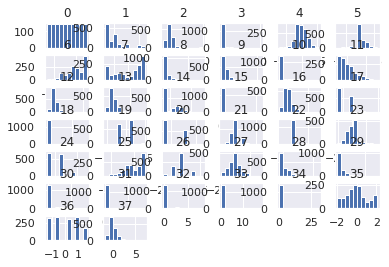

In [34]:
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
data = df_train.select_dtypes(include=[np.number])
#print(data)
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data_trans = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_trans)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
plt.show()

Distributions have been adjusted and that the mean is a very small number close to zero and the standard deviation is very close to 1.0 for each variable.

# Modeling

# Conclusion